# Using ML models Predicting Volatility
- Afet Ibadova 453818
- Daryush Ray 455894

## Introduction
**The aim of the Project** - (this part need to be added)

## 1. Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

ticker_symbol = "^GSPC"
#<---- 20 year data
start_date = "2002-01-01"
end_date = "2022-01-01"

df = yf.download(ticker_symbol, start=start_date, end=end_date)


C:\Users\Afat\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[*********************100%***********************]  1 of 1 completed


In [3]:
# Check the type of the index
print(type(df.index))


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [4]:
print(df.head(4))
print(df.describe())
print(df.info())


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2001-12-31  1161.020020  1161.160034  1148.040039  1148.079956  1148.079956   
2002-01-02  1148.079956  1154.670044  1136.229980  1154.670044  1154.670044   
2002-01-03  1154.670044  1165.270020  1154.010010  1165.270020  1165.270020   
2002-01-04  1165.270020  1176.550049  1163.420044  1172.510010  1172.510010   

                Volume  
Date                    
2001-12-31   943600000  
2002-01-02  1171000000  
2002-01-03  1398900000  
2002-01-04  1513000000  
              Open         High          Low        Close    Adj Close  \
count  5037.000000  5037.000000  5037.000000  5037.000000  5037.000000   
mean   1818.221919  1828.282268  1807.485208  1818.585354  1818.585354   
std     885.127184   888.395202   881.778524   885.442409   885.442409   
min     679.280029   695.270020   666.789978   676.530029   676.530029   
25%  

In [5]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

## 2. EDA

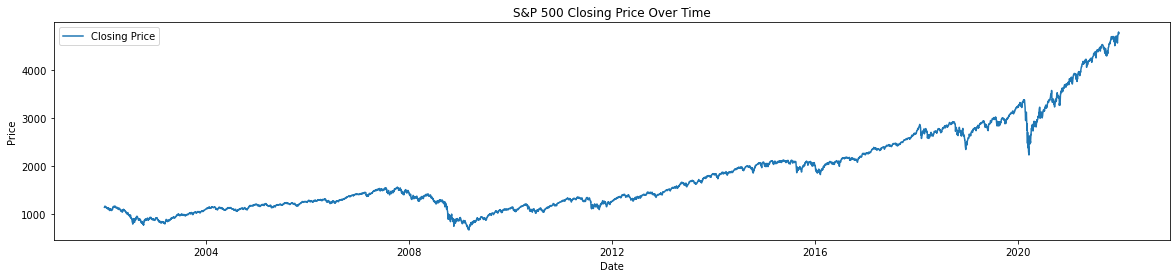

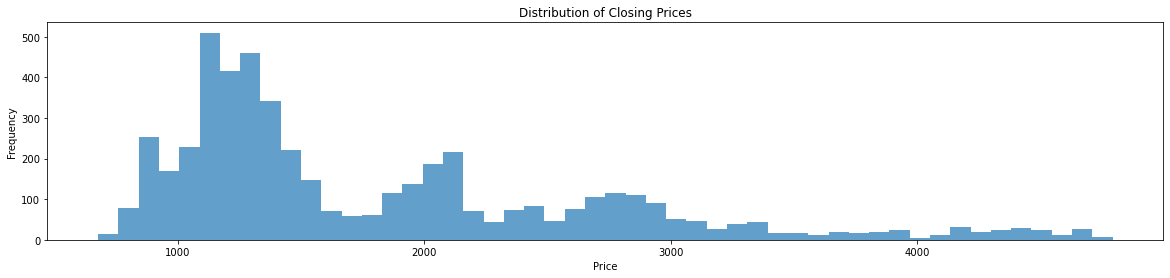

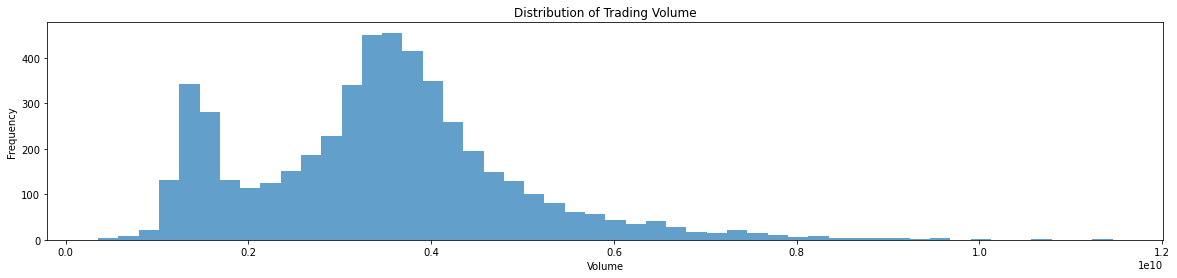

In [6]:
#<--- closing prices
plt.figure(figsize=(20, 4))
plt.plot(df['Close'], label='Closing Price')
plt.title('S&P 500 Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#<--- distribution of closing
plt.figure(figsize=(20, 4))
plt.hist(df['Close'], bins=50, alpha=0.7)
plt.title('Distribution of Closing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#<--- volume
plt.figure(figsize=(20, 4))
plt.hist(df['Volume'], bins=50, alpha=0.7)
plt.title('Distribution of Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

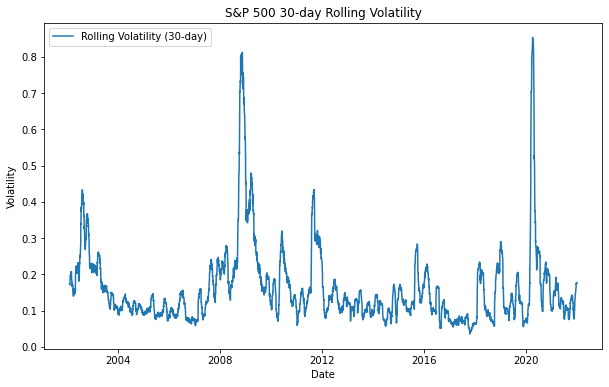

In [7]:
#<--- daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Calculate rolling volatility (30-day window)
df['Volatility'] = df['Daily_Return'].rolling(window=30).std() * np.sqrt(252)  # Annualized

# Plot the volatility
plt.figure(figsize=(10, 6))
plt.plot(df['Volatility'], label='Rolling Volatility (30-day)')
plt.title('S&P 500 30-day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

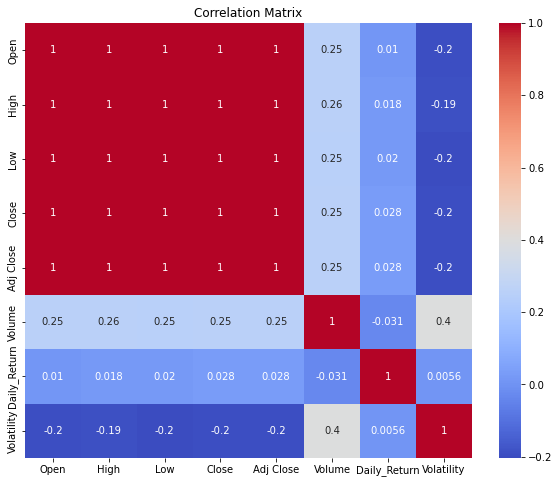

In [8]:
#<--- correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 3. Data Preprocessing and Feature Engineering

In [10]:
df.isnull().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Daily_Return     1
Volatility      30
dtype: int64

In [11]:
df['Daily_Return'].fillna(0, inplace=True) #<--- first day's return we assume 0
df.dropna(inplace=True) #<--- dropping the Volatility windows since it is realitvely small
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Daily_Return    0
Volatility      0
dtype: int64

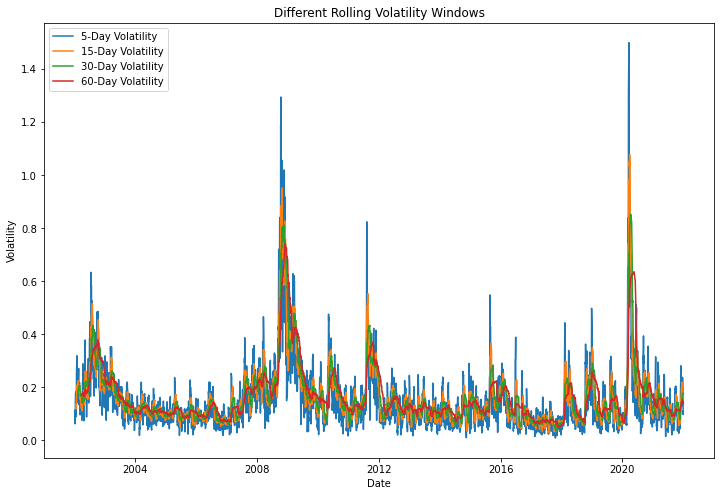

In [9]:
#<--- rolling volatility with different windows

for window in [5, 15, 30, 60]:
    df[f'Volatility_{window}d'] = df['Daily_Return'].rolling(window=window).std() * np.sqrt(252)  # Annualized

##<---- Different window sizes could capture volatility over different time horizons. 15-day window might capture short-term volatility, while a 90-day window might reflect longer-term trends.
plt.figure(figsize=(12, 8))
plt.plot(df['Volatility_5d'], label='5-Day Volatility')
plt.plot(df['Volatility_15d'], label='15-Day Volatility')
plt.plot(df['Volatility_30d'], label='30-Day Volatility')
plt.plot(df['Volatility_60d'], label='60-Day Volatility')
plt.title('Different Rolling Volatility Windows')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

df.drop(columns=['Volatility_5d', 'Volatility_15d', 'Volatility_30d', 'Volatility_60d'], inplace=True)


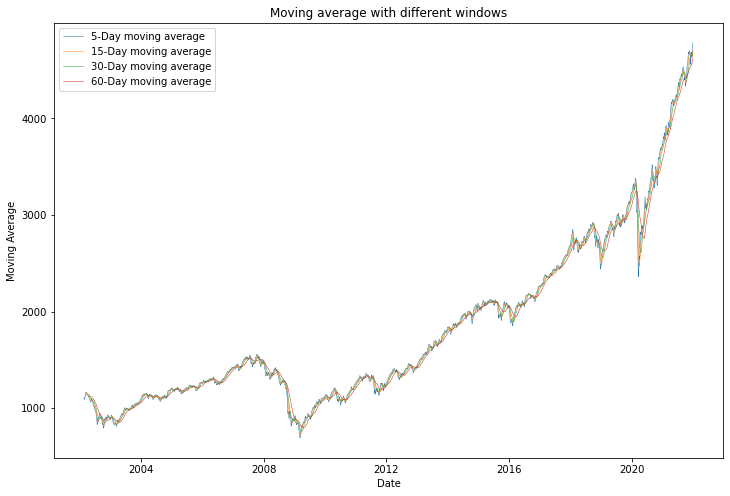

In [13]:
#<--- moving average with different corresponding volatility windows
for window in [5, 15, 30, 60]:
    df[f'MA_{window}d'] = df['Close'].rolling(window=window).mean()

##<---- Different window sizes could capture volatility over different time horizons. 15-day window might capture short-term volatility, while a 90-day window might reflect longer-term trends.
plt.figure(figsize=(12, 8))
plt.plot(df['MA_5d'], label='5-Day moving average', linewidth=0.5)
plt.plot(df['MA_15d'], label='15-Day moving average', linewidth=0.5)
plt.plot(df['MA_30d'], label='30-Day moving average', linewidth=0.5)
plt.plot(df['MA_60d'], label='60-Day moving average', linewidth=0.5)
plt.title('Moving average with different windows', )
plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.legend()
plt.show()

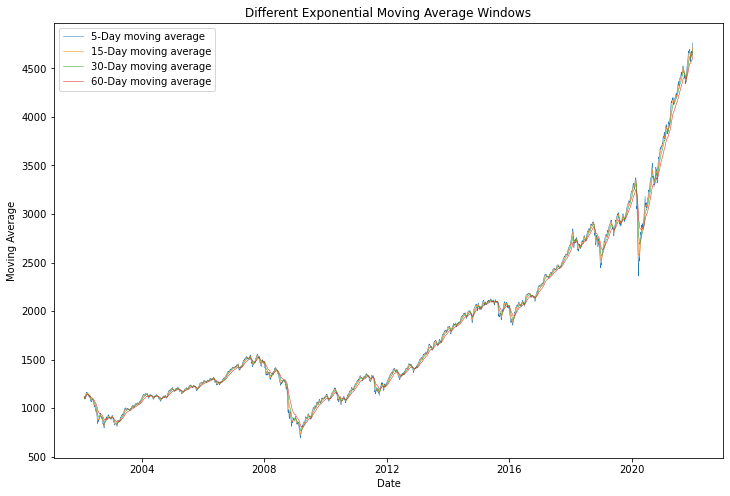

In [14]:
#<--- exponential moving average with different corresponding volatility windows

for window in [5, 15, 30, 60]:
    df[f'EMA_{window}d'] = df['Close'].ewm(span=window).mean()

plt.figure(figsize=(12, 8))
plt.plot(df['EMA_5d'], label='5-Day moving average', linewidth=0.5)
plt.plot(df['EMA_15d'], label='15-Day moving average', linewidth=0.5)
plt.plot(df['EMA_30d'], label='30-Day moving average', linewidth=0.5)
plt.plot(df['EMA_60d'], label='60-Day moving average', linewidth=0.5)
plt.title('Different Exponential Moving Average Windows')
plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.legend()
plt.show()

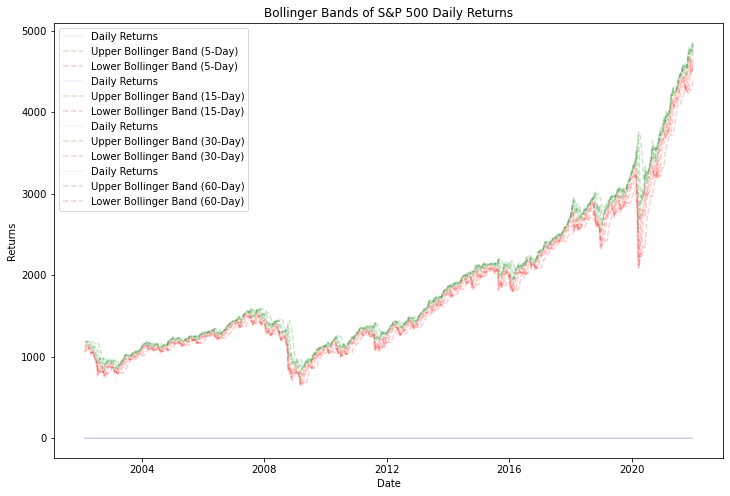

In [15]:
#<--- defining the initial parameters for the Bollinger Bands
Daily_Return_windows = [5, 15, 30, 60]
std_dev_multiplier = 2

#<--- calculating the Bollinger Bands
for window in Daily_Return_windows:
    df[f'RollingMean_{window}d'] = df[f'MA_{window}d']
    df[f'RollingStd_{window}d'] = df['Close'].rolling(window=window).std()
    df[f'UpperBollinger_{window}d'] = df[f'RollingMean_{window}d'] + (df[f'RollingStd_{window}d'] * std_dev_multiplier)
    df[f'LowerBollinger_{window}d'] = df[f'RollingMean_{window}d'] - (df[f'RollingStd_{window}d'] * std_dev_multiplier)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for window in Daily_Return_windows:
    plt.plot(df['Daily_Return'], label='Daily Returns', alpha=0.8, color='blue', linewidth=0.1)
    plt.plot(df[f'UpperBollinger_{window}d'], label=f'Upper Bollinger Band ({window}-Day)', linestyle='--', alpha=0.2, color='green')
    plt.plot(df[f'LowerBollinger_{window}d'], label=f'Lower Bollinger Band ({window}-Day)', linestyle='--', alpha=0.2, color='red')

plt.title('Bollinger Bands of S&P 500 Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

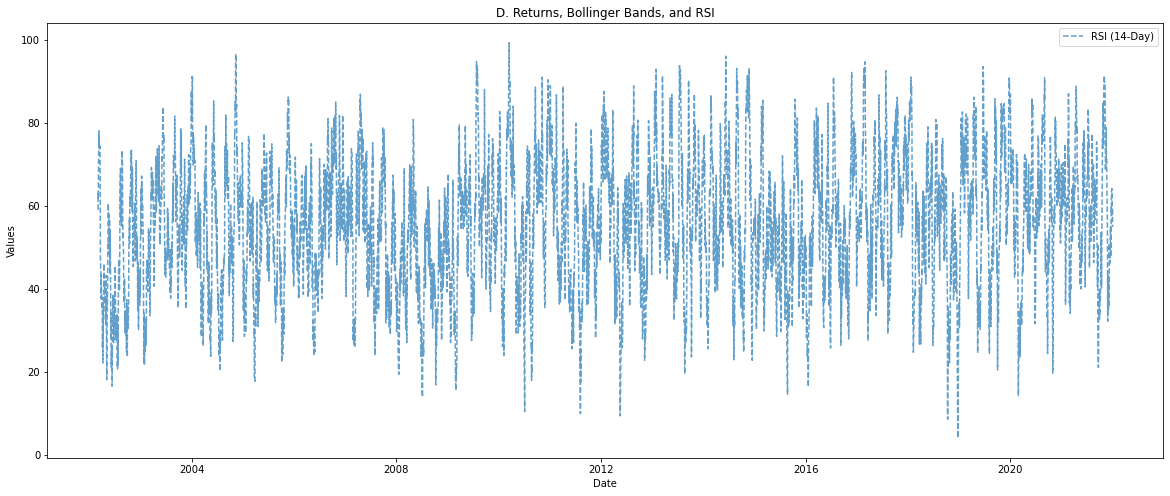

In [16]:
#<--- main function to calculate the RSI
def calculate_rsi(data, window=14):
    delta = data.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

rsi_window = 14  #<--- most common window size
df['RSI'] = calculate_rsi(df['Close'], window=rsi_window)

plt.figure(figsize=(20, 8))
plt.plot(df['RSI'], label=f'RSI ({rsi_window}-Day)', linestyle='--', alpha=0.7)

plt.title('D. Returns, Bollinger Bands, and RSI')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

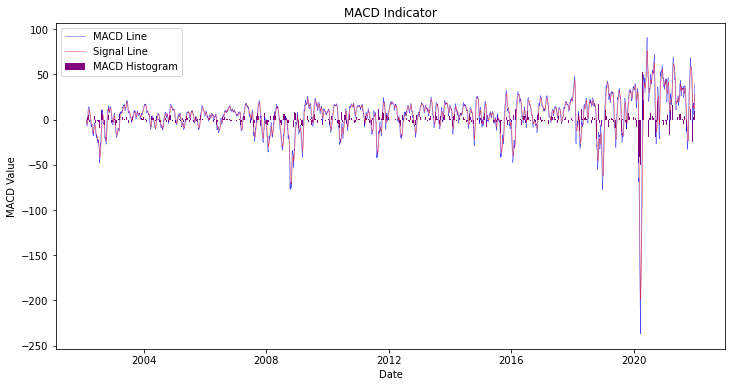

In [17]:
import pandas as pd

df.index = pd.to_datetime(df.index)
#<--- defining the initial parameters for the MACD (most commonly used) <--- to be checked
short_window = 12
long_window = 26

#<--- calculating the 12-day and 26-day EMA
df[f'EMA_{short_window}d'] = df['Close'].ewm(span=short_window, adjust=False).mean()
df[f'EMA_{long_window}d'] = df['Close'].ewm(span=long_window, adjust=False).mean()

#<--- calculating the MACD Line, Signal line and histogram
df['MACD_Line'] = df[f'EMA_{short_window}d'] - df[f'EMA_{long_window}d']

#<--- calculating the Signal Line (9-day EMA of the MACD Line)
df['Signal_Line'] = df['MACD_Line'].ewm(span=9).mean()
#<--- calculating the MACD Histogram (MACD Line - Signal Line)
df['MACD_Histogram'] = df['MACD_Line'] - df['Signal_Line']


# Plotting MACD and Signal Line
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['MACD_Line'], label='MACD Line', color='blue', alpha=0.7, linewidth=0.5)
plt.plot(df.index, df['Signal_Line'], label='Signal Line', color='red', alpha=0.7, linewidth=0.5)
plt.bar(df.index, df['MACD_Histogram'], label='MACD Histogram', color='purple', alpha=1)
plt.title('MACD Indicator')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.show()

#<--- dropping the columns that are not needed (we only need the MACD Line and Signal Line)
df.drop(columns=[f'EMA_{short_window}d', f'EMA_{long_window}d'], inplace=True)

In [18]:
df['Lagged_Close'] = df['Close'].shift(1) #<--- shift by 1 day (simple lag)
df['Lagged_Return'] = df['Daily_Return'].shift(1) #<--- shift by 1 day (simple lag)
df['Lagged_Close_5d'] = df['Close'].shift(5) #<--- 5
df['Lagged_Return_5d'] = df['Daily_Return'].shift(5) #<--- 5
#df[f'Rolling_Vol_{window}d'] = df['Daily_Return'].rolling(window=window).std()
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))


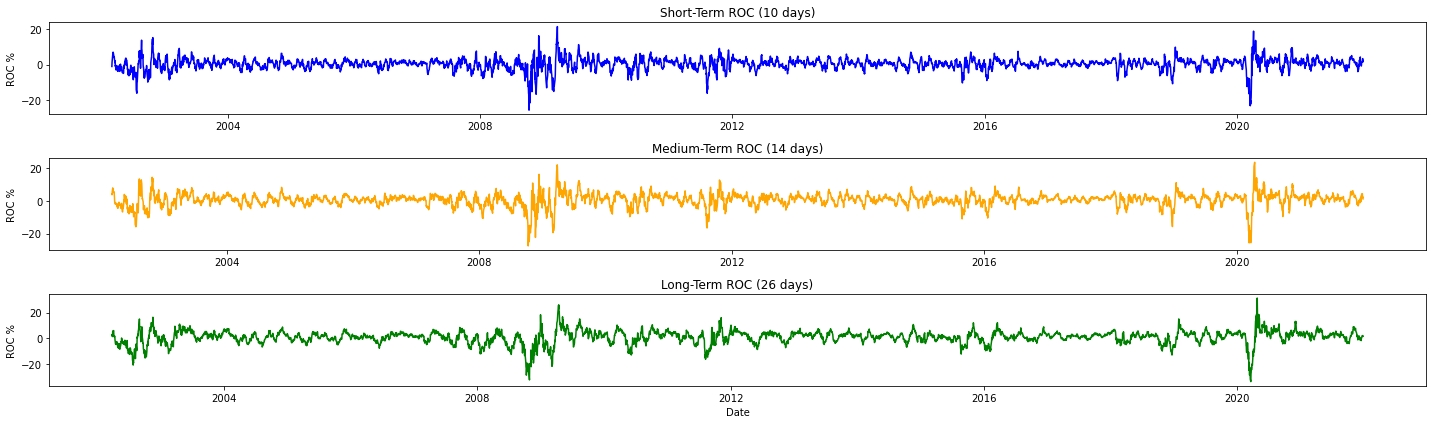

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
#<--- defining the initial parameters for the ROC
short_term_n = 10  #<--- 10 days, short-term
medium_term_n = 14  #<--- 14 days, medium-term
long_term_n = 26   #<--- 26 days, long-term

#<--- calculations
df['ROC_Short_Term'] = ((df['Close'] - df['Close'].shift(short_term_n)) / df['Close'].shift(short_term_n)) * 100
df['ROC_Medium_Term'] = ((df['Close'] - df['Close'].shift(medium_term_n)) / df['Close'].shift(medium_term_n)) * 100
df['ROC_Long_Term'] = ((df['Close'] - df['Close'].shift(long_term_n)) / df['Close'].shift(long_term_n)) * 100

plt.figure(figsize=(20, 6))

plt.subplot(3, 1, 1)
plt.plot(df.index, df['ROC_Short_Term'], label='Short-Term ROC (10 days)', color='blue')
plt.title('Short-Term ROC (10 days)')
plt.ylabel('ROC %')

plt.subplot(3, 1, 2)
plt.plot(df.index, df['ROC_Medium_Term'], label='Medium-Term ROC (14 days)', color='orange')
plt.title('Medium-Term ROC (14 days)')
plt.ylabel('ROC %')

plt.subplot(3, 1, 3)
plt.plot(df.index, df['ROC_Long_Term'], label='Long-Term ROC (26 days)', color='green')
plt.title('Long-Term ROC (26 days)')
plt.xlabel('Date')
plt.ylabel('ROC %')

plt.tight_layout()
plt.show()

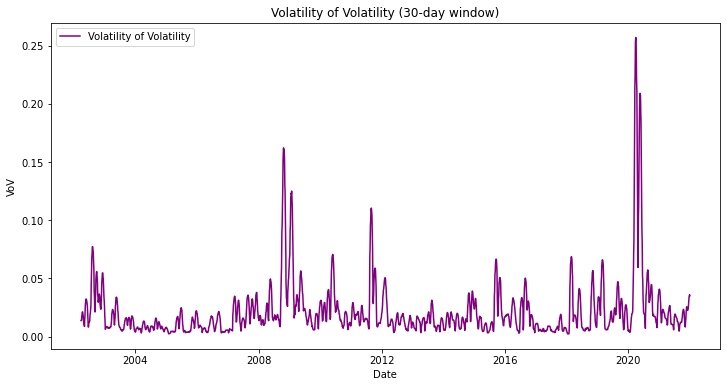

In [20]:
#<--- Volatility of Volatility (VoV) :D :D :D
vov_window = 30

df['Volatility_of_Volatility'] = df['Volatility'].rolling(window=vov_window).std()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volatility_of_Volatility'], label='Volatility of Volatility', color='purple')
plt.title('Volatility of Volatility (30-day window)')
plt.xlabel('Date')
plt.ylabel('VoV')
plt.legend()
plt.show()



In [21]:
##cell reserved to code Implied Volatility from option market data

In [22]:
correlation_matrix = df.corr()
correlation_matrix.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Volatility,MA_5d,MA_15d,...,MACD_Histogram,Lagged_Close,Lagged_Return,Lagged_Close_5d,Lagged_Return_5d,Log_Return,ROC_Short_Term,ROC_Medium_Term,ROC_Long_Term,Volatility_of_Volatility
Open,1.000000,0.999918,0.999874,0.999795,0.999795,0.249467,0.009903,-0.197829,0.999822,0.999083,...,0.009581,0.999952,0.026986,0.998935,0.024737,0.011650,0.088091,0.107148,0.151476,0.041777
High,0.999918,1.000000,0.999830,0.999888,0.999888,0.252639,0.017895,-0.192923,0.999816,0.999207,...,0.007820,0.999844,0.024752,0.999016,0.023749,0.019524,0.087263,0.105390,0.148841,0.045909
Low,0.999874,0.999830,1.000000,0.999901,0.999901,0.244369,0.019955,-0.203134,0.999661,0.998745,...,0.014953,0.999782,0.027834,0.998615,0.025755,0.021831,0.094942,0.113705,0.157542,0.037401
Close,0.999795,0.999888,0.999901,1.000000,1.000000,0.248297,0.027693,-0.197755,0.999687,0.998914,...,0.012686,0.999692,0.024668,0.998739,0.024395,0.029446,0.093601,0.111576,0.154516,0.042005
Adj Close,0.999795,0.999888,0.999901,1.000000,1.000000,0.248297,0.027693,-0.197755,0.999687,0.998914,...,0.012686,0.999692,0.024668,0.998739,0.024395,0.029446,0.093601,0.111576,0.154516,0.042005


In [23]:
df.dropna(inplace=True) #<--- dropping the Volatility windows since it is realitvely small
#df.isnull().sum()

#### Feature Selection

In [24]:
#Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['Volatility'])
y = df['Volatility']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False, random_state=777)

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)


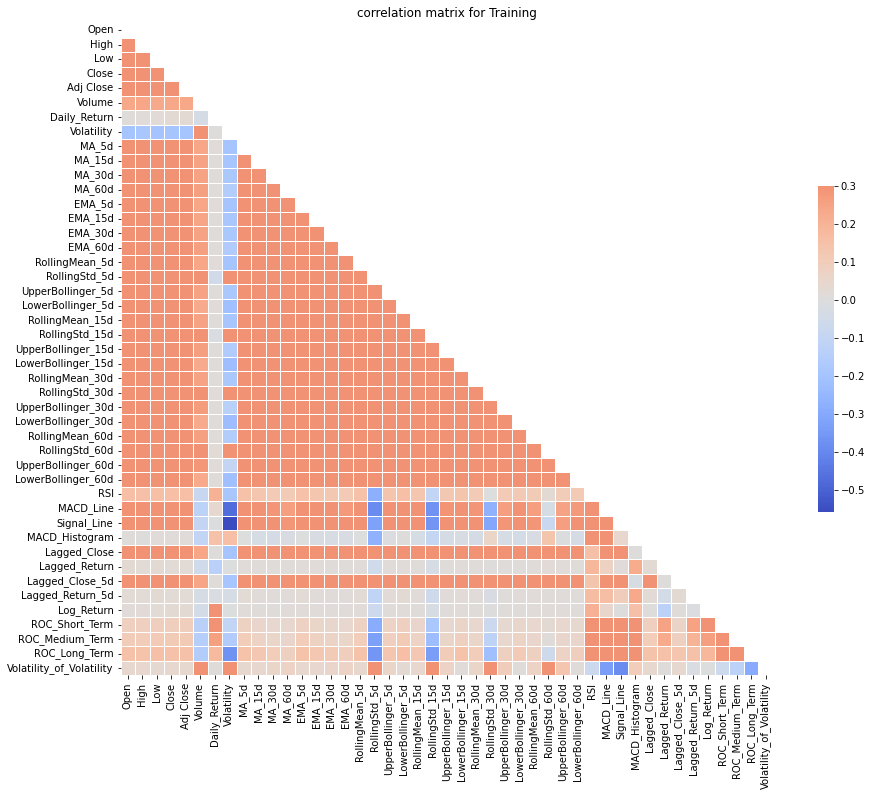

highly correlated variables: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily_Return', 'Volatility', 'MA_5d', 'MA_15d', 'MA_30d', 'MA_60d', 'EMA_5d', 'EMA_15d', 'EMA_30d']


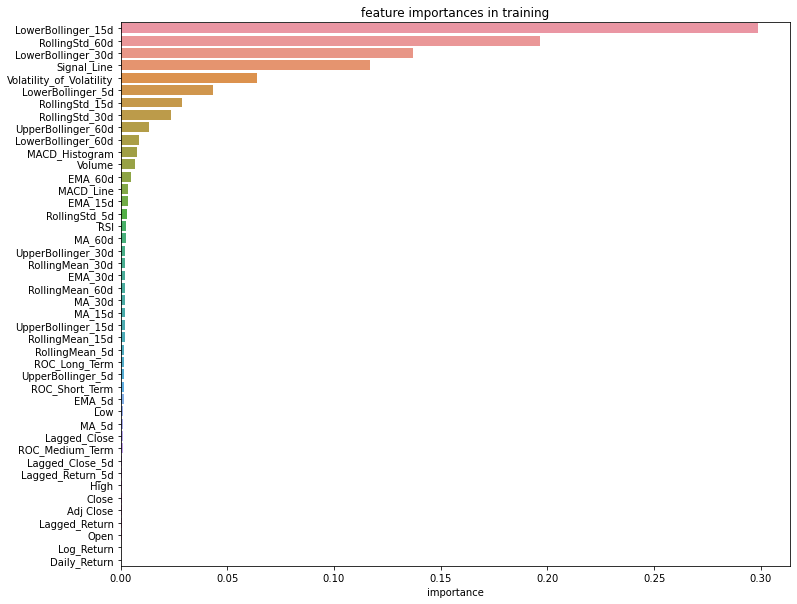

top 15 features: ['LowerBollinger_15d', 'RollingStd_60d', 'LowerBollinger_30d', 'Signal_Line', 'Volatility_of_Volatility', 'LowerBollinger_5d', 'RollingStd_15d', 'RollingStd_30d', 'UpperBollinger_60d', 'LowerBollinger_60d', 'MACD_Histogram', 'Volume', 'EMA_60d', 'MACD_Line', 'EMA_15d']


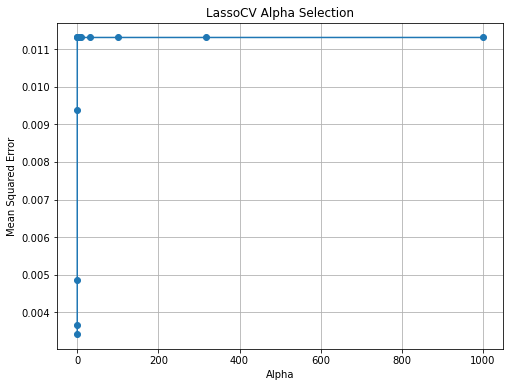

Best alpha: 0.001
Top selected features: Index(['Volume', 'RollingStd_5d', 'LowerBollinger_5d', 'RollingStd_15d',
       'RollingStd_30d', 'LowerBollinger_30d', 'RollingStd_60d', 'RSI',
       'Signal_Line', 'MACD_Histogram', 'Lagged_Return', 'ROC_Short_Term',
       'ROC_Medium_Term', 'ROC_Long_Term', 'Volatility_of_Volatility'],
      dtype='object')


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV, Lasso

#<--- 1. correlation analysis on training
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("correlation matrix for Training")
plt.show()

#<--- highly correlated variables (0.85 threshold)
high_corr_var = [col for col in corr_matrix.columns if any(corr_matrix[col] > 0.85)]
print("highly correlated variables:", high_corr_var[:15])  #<--- 15

#<--- 2. Feature Importance with Random Forest on training
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=777)
rf.fit(X_train, y_train)
feature_importances = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.title("feature importances in training")
plt.show()

print("top 15 features:", feature_importances.index[:15].tolist())


#<---- 3. Create a LassoCV instance
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=False)

lasso = LassoCV(cv=kf, alphas=np.logspace(-3, 3, 13), max_iter=10000, random_state=777)
lasso.fit(X_train_standardized, y_train)

# Visualize the cross-validated performance of the Lasso model for different alpha values
mse_alphas = np.mean(lasso.mse_path_, axis=1)
plt.figure(figsize=(8, 6))
plt.plot(lasso.alphas_, mse_alphas, marker='o')
plt.xlabel("Alpha")
plt.ylabel("Mean Squared Error")
plt.title("LassoCV Alpha Selection")
plt.grid(True)
plt.show()

best_alpha = lasso.alpha_
print("Best alpha:", best_alpha)

# Feature Selection using Recursive Feature Elimination (RFE) with Lasso
lasso_best = Lasso(alpha=best_alpha)
rfe = RFE(lasso_best, n_features_to_select=15)  # Adjust the number of features as needed
rfe.fit(X_train_standardized, y_train)
selected_features = X_train.columns[rfe.support_]
print("Top selected features:", selected_features)

## 4. Modelling
### LSTM

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Assuming X_train_standardized and y_train are already prepared

# Reshape input data to be 3D [samples, timesteps, features] for LSTM
# For example, if your data is currently 2D with 100 samples and 30 features:
# X_train_reshaped = X_train_standardized.reshape((100, 1, 30))

X_train_reshaped = X_train_standardized.reshape((X_train_standardized.shape[0], 1, X_train_standardized.shape[1]))

# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)




Epoch 1/50

112/112 [==============================] - 5s 18ms/step - loss: 0.0058 - val_loss: 0.0087
Epoch 2/50
112/112 [==============================] - 1s 7ms/step - loss: 0.0025 - val_loss: 0.0052
Epoch 3/50
112/112 [==============================] - 1s 6ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 4/50
112/112 [==============================] - 1s 6ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 5/50
112/112 [==============================] - 1s 6ms/step - loss: 0.0015 - val_loss: 9.1828e-04
Epoch 6/50
112/112 [==============================] - 1s 7ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 7/50
112/112 [==============================] - 1s 7ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 8/50
112/112 [==============================] - 1s 6ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 9/50
112/112 [==============================] - 1s 5ms/step - loss: 0.0011 - val_loss: 7.6086e-04
Epoch 10/50
112/112 [==============================] - 1s 5ms/step - loss: 0.0010 - val_

In [26]:
# Evaluate the model
# Reshape X_test as done for X_train
X_test_reshaped = X_test_standardized.reshape((X_test_standardized.shape[0], 1, X_test_standardized.shape[1]))
test_loss = model.evaluate(X_test_reshaped, y_test)

# Make predictions
predictions = model.predict(X_test_reshaped)


16/16 [==============================] - 1s 4ms/step


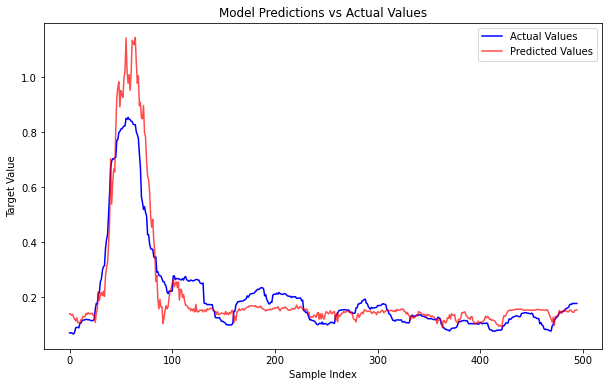

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Convert to numpy arrays and flatten
predictions_flat = np.array(predictions).flatten()
y_test_flat = np.array(y_test).flatten()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test_flat, label='Actual Values', color='blue')
plt.plot(predictions_flat, label='Predicted Values', color='red', alpha=0.7)
plt.title('Model Predictions vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()


1. **Overall Trend**: The LSTM model seems to capture the overall trend of the actual data quite well, as the peaks and troughs of the predicted values generally align with those of the actual values.

2. **Peak Performance**: Around the peak (near the 50-150 sample index range), the model's predictions closely match the actual values, which suggests that the model performs well in capturing the dynamics of the series at this particular segment.

3. **Stability**: The model appears stable as it does not produce wildly fluctuating predictions; instead, the predictions seem smooth and consistent.

4. **Lagging Issue**: There seems to be a slight lag in the model's predictions in response to the actual values, especially noticeable at the peak. This is a common issue with time series prediction models where the predicted curve follows the actual curve but with a slight delay.

5. **Noise Handling**: The model smooths out some of the noise in the actual data, which is evident in the less jagged nature of the predicted values compared to the actual values. This can be both good and bad: good if the noise is not informative, bad if the noise contains information the model is missing.

6. **End Performance**: Towards the end of the sequence (after the 400 sample index), the model maintains its predictive quality, indicating that it hasn't deteriorated over time, which can sometimes happen with RNNs if they begin to "forget" earlier patterns.

7. **Metric Evaluation**: To quantitatively assess the model's performance, one would typically look at metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or Root Mean Squared Error (RMSE), which are not provided here but can give a clearer indication of how well the predicted values match the actual values.

8. **Overfitting/Underfitting**: From this graph alone, we cannot tell if the model is overfitting or underfitting. Overfitting would mean that the model performs very well on the training data but poorly on unseen data. Underfitting would mean the model is too simple to capture the underlying structure of the data. Further analysis, such as evaluating the model on a separate test dataset, would be needed to determine this.

In conclusion, the LSTM model appears to do a reasonably good job of predicting the target variable. However, for a thorough evaluation, you would need to look at the model's performance metrics on both training and validation datasets and consider the context of the data and the specific requirements of the task at hand.

### Prophet

In [43]:
print(df.columns)


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily_Return',
       'Volatility', 'MA_5d', 'MA_15d', 'MA_30d', 'MA_60d', 'EMA_5d',
       'EMA_15d', 'EMA_30d', 'EMA_60d', 'RollingMean_5d', 'RollingStd_5d',
       'UpperBollinger_5d', 'LowerBollinger_5d', 'RollingMean_15d',
       'RollingStd_15d', 'UpperBollinger_15d', 'LowerBollinger_15d',
       'RollingMean_30d', 'RollingStd_30d', 'UpperBollinger_30d',
       'LowerBollinger_30d', 'RollingMean_60d', 'RollingStd_60d',
       'UpperBollinger_60d', 'LowerBollinger_60d', 'RSI', 'MACD_Line',
       'Signal_Line', 'MACD_Histogram', 'Lagged_Close', 'Lagged_Return',
       'Lagged_Close_5d', 'Lagged_Return_5d', 'Log_Return', 'ROC_Short_Term',
       'ROC_Medium_Term', 'ROC_Long_Term', 'Volatility_of_Volatility'],
      dtype='object')


In [60]:
# Resetting the index to make the date a column
df_reset = df.reset_index()
df_reset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Daily_Return', 'Volatility', 'MA_5d', 'MA_15d', 'MA_30d', 'MA_60d',
       'EMA_5d', 'EMA_15d', 'EMA_30d', 'EMA_60d', 'RollingMean_5d',
       'RollingStd_5d', 'UpperBollinger_5d', 'LowerBollinger_5d',
       'RollingMean_15d', 'RollingStd_15d', 'UpperBollinger_15d',
       'LowerBollinger_15d', 'RollingMean_30d', 'RollingStd_30d',
       'UpperBollinger_30d', 'LowerBollinger_30d', 'RollingMean_60d',
       'RollingStd_60d', 'UpperBollinger_60d', 'LowerBollinger_60d', 'RSI',
       'MACD_Line', 'Signal_Line', 'MACD_Histogram', 'Lagged_Close',
       'Lagged_Return', 'Lagged_Close_5d', 'Lagged_Return_5d', 'Log_Return',
       'ROC_Short_Term', 'ROC_Medium_Term', 'ROC_Long_Term',
       'Volatility_of_Volatility'],
      dtype='object')

In [68]:
# Selecting 'Date' as 'ds' and 'Daily_Return' as 'y'
prophet_df = df_reset[['Date', 'Daily_Return']].rename(columns={'Date': 'ds', 'Daily_Return': 'y'})

# Convert 'ds' to datetime if it's not already
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])

prophet_df.head()

,ds,y
0,2002-05-09,-0.014547
1,2002-05-10,-0.016794
2,2002-05-13,0.018550
3,2002-05-14,0.021144
4,2002-05-15,-0.005660


In [69]:
#Split data
train_size = int(len(prophet_df) * 0.9)
train_df = prophet_df.iloc[:train_size]
test_df = prophet_df.iloc[train_size:]


In [70]:
#Initialize and Fit the Prophet Model
from prophet import Prophet

model = Prophet()
model.fit(prophet_df)


22:08:19 - cmdstanpy - INFO - Chain [1] start processing
22:08:20 - cmdstanpy - INFO - Chain [1] done processing


In [71]:
#future prediction
future_dates = test_df[['ds']]
forecast = model.predict(future_dates)


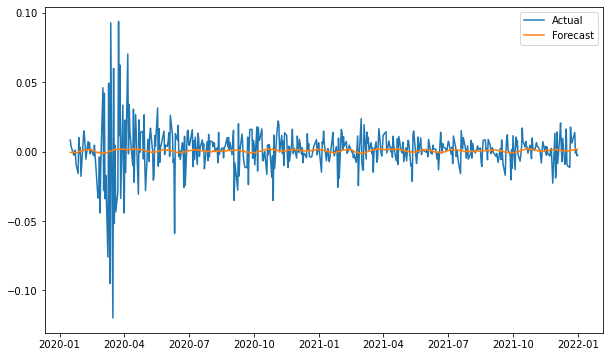

In [72]:
#Evaluate the model

# Merging forecasted values with the actual test values
forecasted = forecast.set_index('ds')[['yhat']].join(test_df.set_index('ds'))

# Plotting the forecast against actual values
plt.figure(figsize=(10, 6))
plt.plot(forecasted['y'], label='Actual')
plt.plot(forecasted['yhat'], label='Forecast')
plt.legend()
plt.show()


### XGBoost


In [73]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np


# Select features based on your feature selection outcome, excluding 'Daily_Return' which is the target
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Volatility', 
            'MA_5d', 'MA_15d', 'MA_30d', 'MA_60d', 'EMA_5d', 'EMA_15d', 'EMA_30d']

X = df[features]
y = df['Daily_Return'] 

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                           max_depth=5, alpha=10, n_estimators=100)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = xg_reg.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

mse, rmse, mae


(0.00016140893299490915, 0.012704681538508124, 0.008401660006509784)

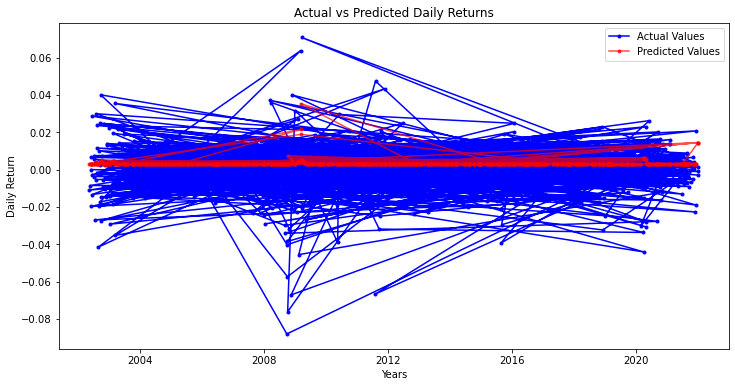

In [77]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Values', marker='.', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Values', marker='.', color='red', alpha=0.7)
plt.title('Actual vs Predicted Daily Returns')
plt.xlabel('Years')
plt.ylabel('Daily Return')
plt.legend()
plt.show()


### GARCH (1,1)

In [44]:
from arch import arch_model


# Convert returns to a suitable format if necessary (e.g., percentage points, scaling, etc.)
returns = df['Daily_Return']

# Define the GARCH model
garch = arch_model(returns, vol='Garch', p=1, q=1)

# Fit the model
res = garch.fit(update_freq=10)

# Print the summary of the fit
print(res.summary())


Iteration:     10,   Func. Count:    132,   Neg. LLF: -8498.292203806268
Optimization terminated successfully    (Exit mode 0)
            Current function value: -8498.292140110567
            Iterations: 14
            Function evaluations: 132
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results                      
Dep. Variable:           Daily_Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8498.29
Distribution:                  Normal   AIC:                          -16988.6
Method:            Maximum Likelihood   BIC:                          -16962.6
                                        No. Observations:                 4948
Date:                Wed, Jan 17 2024   Df Residuals:                     4947
Time:                        01:05:19   Df Model:                            1
     

C:\Users\Afat\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001497. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [54]:
from arch import arch_model
# Rescale the 'Daily_Return' by multiplying by 100 (to convert to percentage points)
df['Daily_Return_Scaled'] = df['Daily_Return'] * 100

# Now, use the scaled returns for the GARCH model
returns = df['Daily_Return_Scaled']

# Define the GARCH model
garch = arch_model(returns, vol='Garch', p=1, q=1)

# Fit the model
res1 = garch.fit(update_freq=10)

# Print the summary of the fit
print(res1.summary())

Iteration:     10,   Func. Count:     62,   Neg. LLF: 6579.138264931521
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6579.138264931521
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11
                      Constant Mean - GARCH Model Results                      
Dep. Variable:     Daily_Return_Scaled   R-squared:                       0.000
Mean Model:              Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       GARCH   Log-Likelihood:               -6579.14
Distribution:                   Normal   AIC:                           13166.3
Method:             Maximum Likelihood   BIC:                           13192.3
                                         No. Observations:                 4948
Date:                 Wed, Jan 17 2024   Df Residuals:                     4947
Time:                         01:06:43   Df Model:                            1

1. **Log-Likelihood**: The log-likelihood has improved after rescaling, which is a good sign. It suggests the optimizer had an easier time finding a parameter set that fits the data.

2. **Model Coefficients**:
   - `mu`: The mean of the returns is now 0.0699, which represents the average daily return in percentage points. This value is statistically significant with a very low p-value.
   - `omega`: The baseline volatility (when there are no shocks) is 0.0254, which is now significant, indicating a better model fit post-rescaling.
   - `alpha[1]`: The coefficient for lagged squared residuals is 0.1287, meaning around 12.87% of volatility shocks from the previous period will affect the current period's volatility. This is statistically significant.
   - `beta[1]`: The coefficient for lagged conditional variance is 0.8498, suggesting a high level of volatility persistence. This means a large portion of volatility from the previous period will carry over to the next. This is also statistically significant.

3. **Statistical Significance**: The p-values for the coefficients (`mu`, `omega`, `alpha[1]`, `beta[1]`) are all very low, indicating that the coefficients are statistically significant and the variables are indeed relevant in explaining the variance in the returns.

4. **Model Fit Metrics**:
   - `AIC` (Akaike Information Criterion): 13166.3
   - `BIC` (Bayesian Information Criterion): 13192.3

   Both AIC and BIC have changed after rescaling. These are absolute numbers and their interpretability is relative; they are used for comparing different models. The lower these values, the better the model fit when comparing different models.

5. **Convergence**: The optimization terminated successfully, meaning the best-fit parameters were found without any errors.

In [55]:
# Forecast the next 10 steps ahead
forecasts = res1.forecast(horizon=10, method='simulation')

# Print the forecast variance
print(forecasts.variance[-1:])


                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2021-12-31  0.801612  0.811665  0.814849  0.816175  0.825539  0.841382   

                h.07      h.08      h.09      h.10  
Date                                                
2021-12-31  0.842711  0.852809  0.860674  0.865923  


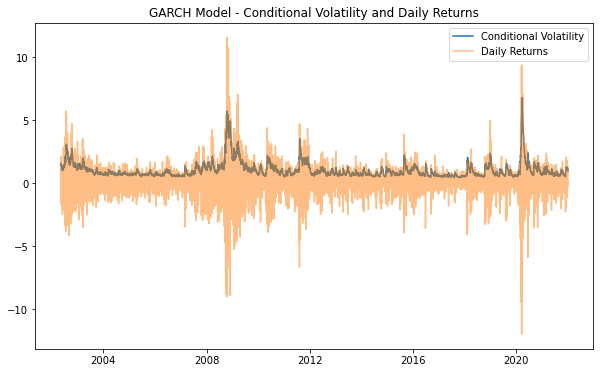

In [56]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the conditional volatility
ax.plot(res1.conditional_volatility, label='Conditional Volatility')

# Optionally, overlay the actual returns to compare
ax.plot(returns, label='Daily Returns', alpha=0.5)

ax.set_title('GARCH Model - Conditional Volatility and Daily Returns')
ax.legend()

plt.show()


1. **Model Fit**: The graph suggests that the GARCH(1,1) model is capturing the essence of volatility clustering: periods of high volatility are followed by high volatility, and periods of low volatility are followed by low volatility. This is a fundamental property of financial time series that GARCH models are designed to capture.

2. **Extreme Values**: You may notice that the conditional volatility does not spike as sharply as the daily returns. This could be because the GARCH model smooths out these extremes, as it estimates an average volatility over time. However, it should capture the general trend where larger spikes in returns correlate with higher volatility.

3. **Stability and Mean Reversion**: The model appears stable over time, with no apparent breakdowns or drifts in the volatility estimation, which is good. The mean-reverting nature of volatility is also evident, as it doesn't seem to escalate indefinitely but rather tends to come back down after a spike.

3. **High Impact Events**: The largest spikes in daily returns, likely corresponding to market shocks or significant news events, seem to be associated with the highest peaks in volatility. This is to be expected, as such events typically lead to increased uncertainty and risk in the markets.

4. **Normal Periods**: During periods without market shocks, the conditional volatility estimate is relatively stable and low, suggesting that the model isn't overreacting to the normal fluctuations in returns.

Overall, the GARCH(1,1) model appears to be doing a good job of modeling the volatility of daily returns. 

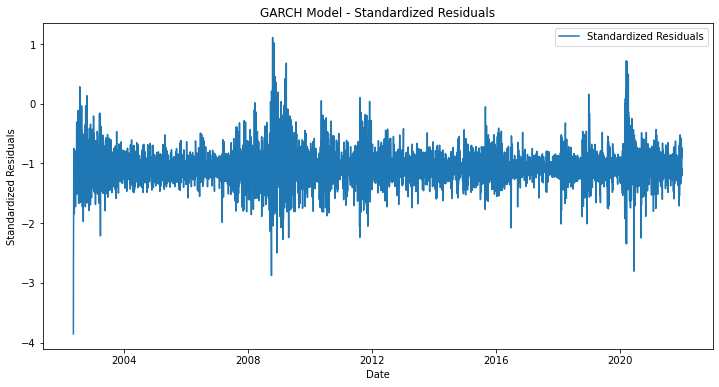

In [59]:
import matplotlib.pyplot as plt

# Get the standardized residuals from the GARCH model
std_resid = res.std_resid

# Plot the standardized residuals
plt.figure(figsize=(12, 6))
plt.plot(std_resid, label='Standardized Residuals')
plt.title('GARCH Model - Standardized Residuals')
plt.xlabel('Date')
plt.ylabel('Standardized Residuals')
plt.legend()
plt.show()


1. **Centered Around Zero**: The residuals are centered around zero, this indicates that the model is not biased and that there's no systematic underestimation or overestimation of volatility.

2. **No Apparent Patterns**: Ideally, the residuals of a well-specified GARCH model should resemble white noise, meaning they should show no apparent autocorrelation or patterns. From the plot, there don't seem to be any obvious patterns, which suggests that the model is capturing the conditional volatility well.

3. **Uniform Variance**: The spread of the residuals appears consistent over time, indicating homoscedasticity. This is what you want after fitting a GARCH model, as it suggests that the model has successfully accounted for changes in volatility.

4. **Outliers**: There are a few large spikes, which may represent outliers or extreme events that the model has not fully accounted for. This is common in financial time series due to the occurrence of unpredictable market events.

5. **Stability**: The model seems stable over the observed period, without any signs of the variance of the residuals widening or narrowing significantly over time, which could suggest model misspecification.

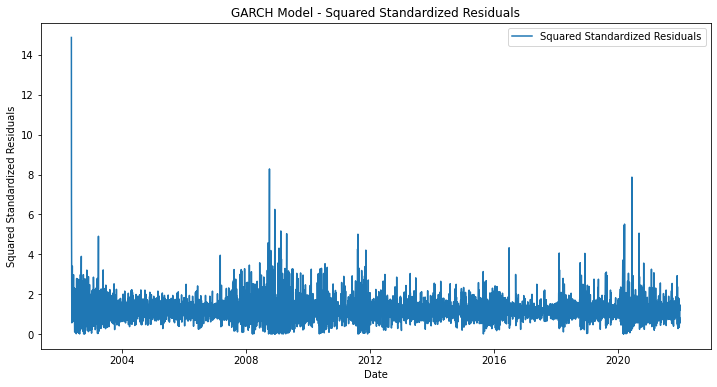

In [58]:
# Plot the squared standardized residuals
plt.figure(figsize=(12, 6))
plt.plot(std_resid ** 2, label='Squared Standardized Residuals')
plt.title('GARCH Model - Squared Standardized Residuals')
plt.xlabel('Date')
plt.ylabel('Squared Standardized Residuals')
plt.legend()
plt.show()


In [13]:
# Check for NaNs in DataFrame
nan_in_df = df.isnull().sum()
print(nan_in_df)


Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Daily_Return    0
Volatility      0
dtype: int64


In [12]:
# Drop rows with NaNs
df = df.dropna()

# Or drop columns with NaNs
df = df.dropna(axis=1)


In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#data
data = df['Daily_Return'].values
data = data.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Prepare the data for RNN
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Set the `look_back` window
look_back = 1
X, y = create_dataset(data_normalized, look_back)

# Reshape the input data to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, input_shape=(1, look_back)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions back to original scale
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Epoch 1/100
126/126 [==============================] - 1s 2ms/step - loss: 0.0868
Epoch 2/100
126/126 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 3/100
126/126 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 4/100
126/126 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 5/100
126/126 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 6/100
126/126 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 7/100
126/126 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 8/100
126/126 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 9/100
126/126 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 10/100
126/126 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 11/100
126/126 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 12/100
126/126 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 13/100


126/126 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 100/100
32/32 [==============================] - 0s 2ms/step
Train Score: 0.01 RMSE
Test Score: 0.01 RMSE
